In [ ]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(img_treino, rotulos_treino),(img_teste, rotulos_teste)=fashion_mnist.load_data()

In [ ]:
rotulos_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser','Pullower','Dress','Coat','Sandal','Shirt','Sneaker', 'Bag', 'Ankle boot']

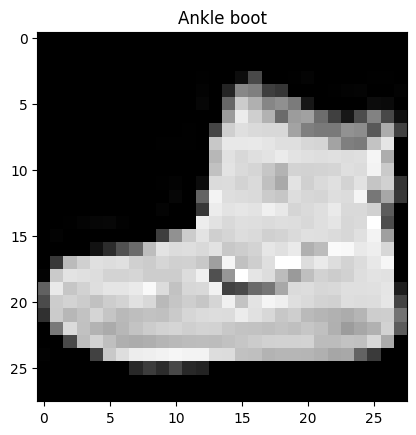

In [ ]:
plt.figure()
plt.title(class_names[rotulos_treino[0]])
plt.imshow(img_treino[0], cmap='gray')

In [ ]:
img_treino[0]

Normaliação dos Dados

In [ ]:
img_treino=img_treino/255.0
img_teste=img_teste/255.0

Construindo modelo

In [ ]:
from keras.api._v2.keras import activations
modelo = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(128, activation='relu',kernel_initializer='random_uniform', bias_initializer='zeros'),
                           keras.layers.Dense(128, activation='relu',kernel_initializer='random_uniform', bias_initializer='zeros'),
                           keras.layers.Dense(10, activation='softmax',kernel_initializer='random_uniform', bias_initializer='zeros')
                           ])

In [ ]:
 modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
historico =modelo.fit(img_treino,
            rotulos_treino,
            validation_split=0.30,
            epochs=25,
            shuffle=True,
            batch_size=16,
            verbose=1
           )

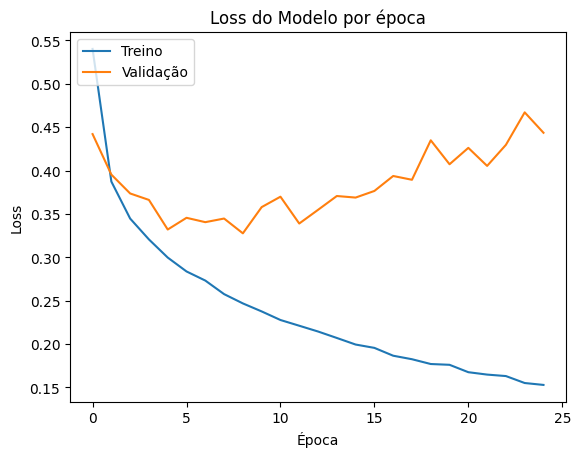

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Loss do Modelo por época")
plt.ylabel("Loss")
plt.xlabel("Época")
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

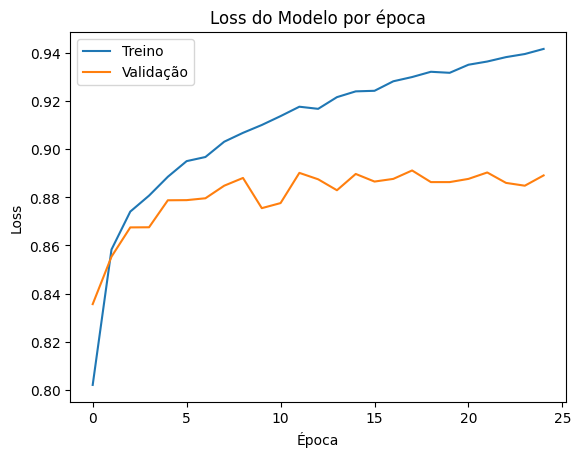

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Loss do Modelo por época")
plt.ylabel("Loss")
plt.xlabel("Época")
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()